# Data Pre-processing

In [3]:
import numpy as np 
import pandas as pd 
import os

In [4]:
path = '/Users/atharvarajadnya/ACE-592-Final-Project/State of the Union-text/sotu'
dirs = os.listdir(path)
df = pd.DataFrame(columns=['year', 'president', 'text', 'party'])
for i in range(len(dirs)):
    components = dirs[i].split('_')
    name = components[0]
    year = components[1].split('.')[0]
    df.loc[i,'year'] = year
    df.loc[i,'president'] = name   
    
    filename = os.path.join(path, dirs[i])
    text_file = open(filename, "r")
    
    lines = text_file.read()
    df.loc[i, 'text'] = lines.replace('\n', ' ')    
df.year = df.year.astype(int) 
df.president = df.president.astype(str)
df.text = df.text.astype(str)

In [5]:
# Need to distinuish between Theodore Roosevelt and Franklin D. Roosevelt

indices = df.query("president =='Roosevelt' & year <= 1909").index
df.loc[indices,'president'] = 'Theodore Roosevelt'

indices = df.query("president == 'Roosevelt'").index
df.loc[indices,'president'] = 'Franklin D. Roosevelt'

indices = df.query("president =='Bush' & year <= 1992").index
df.loc[indices,'president'] = 'George H. W. Bush'

indices = df.query("president == 'Bush'").index
df.loc[indices,'president'] = 'George W. Bush'

indices = df.query("president =='Johnson' & year <= 1869").index
df.loc[indices,'president'] = 'Andrew Johnson'

indices = df.query("president == 'Johnson'").index
df.loc[indices,'president'] = 'Lyndon B. Johnson'

indices = df.query("president =='Adams' & year <= 1801").index
df.loc[indices,'president'] = 'John Adams'

indices = df.query("president == 'Adams'").index
df.loc[indices,'president'] = 'John Quincy Adams'

indices = df.query("president =='Harrison' & year <= 1841").index
df.loc[indices,'president'] = 'William Henry Harrison'

indices = df.query("president == 'Harrison'").index
df.loc[indices,'president'] = 'Benjamin Harrison'

In [6]:
# Add party name to each year

def pres_to_party(name):
    republican = ['Lincoln', 'Grant', 'Hayes', 'Garfield', 'Arthur', 
                  'Benjamin Harrison', 'McKinley', 'Theodore Roosevelt', 
                  'Taft', 'Harding', 'Coolidge', 'Hoover', 'Eisenhower', 
                  'Nixon', 'Ford', 'Reagan', 'George H. W. Bush', 
                  'George W. Bush', 'Trump']
    if name in republican:
        return 'Republican'
    
    democratic = ['Jackson', 'Buren', 'Polk', 'Pierce', 
                  'Buchanan', 'Cleveland', 'Wilson', 'Franklin D. Roosevelt', 
                  'Truman', 'Kennedy', 'Lyndon B. Johnson', 'Carter', 'Clinton', 'Obama']
    if name in democratic:
        return 'Democratic'
    
    whig = ['William Henry Harrison', 'Taylor', 'Fillmore']
    if name in whig:
        return 'Whig'
    
    national_union = ['Andrew Johnson']
    if name in national_union:
        return 'National Union'
    
    unaffiliated = ['Washington', 'Tyler']
    if name in unaffiliated:
        return 'Unaffiliated'
    
    federalist = ['John Adams']
    if name in federalist:
        return 'Federalist'
    
    democratic_republican = ['Jefferson', 'Madison', 'Monroe', 'John Quincy Adams']
    if name in democratic_republican:
        return 'Democratic-Republican'
    
df.party = df.president.apply(pres_to_party)

In [7]:
# Export it into csv file

df.to_csv('State of the Union.csv', index=False)
df

year           president  \
0    1982              Reagan   
1    1902  Theodore Roosevelt   
2    1914              Wilson   
3    1911                Taft   
4    1814             Madison   
..    ...                 ...   
223  1845                Polk   
224  1881              Arthur   
225  1919              Wilson   
226  1979              Carter   
227  2001      George W. Bush   

                                                  text                  party  
0    Mr. Speaker, Mr. President, distinguished Memb...             Republican  
1    To the Senate and House of Representatives:  W...             Republican  
2    GENTLEMEN OF THE CONGRESS:  The session upon w...             Democratic  
3    PART I  This message is the first of several w...             Republican  
4    Fellow-Citizens of the Senate and House of Rep...  Democratic-Republican  
..                                                 ...                    ...  
223  Fellow-Citizens of the Senate and of the House...             Democratic  
224  To the Senate and House of Representatives of ...             Republican  
225  TO THE SENATE AND HOUSE OF REPRESENTATIVES:  I...             Democratic  
226  Tonight I want to examine in a broad sense the...             Democratic  
227  To the Congress of the United States:  Mr. Spe...             Republican  

[228 rows x 4 columns]

# Topic Modeling and Word Cloud

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [9]:
# Preprocess text data

stop_words = set(stopwords.words('english'))
additional_stop_words = ['government', 'congress', 'states','upon','year','people','united','last','may','country','would','must','nation','american','national','public','made']
stop_words.update(additional_stop_words)
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))

# Create a Dictionary from the preprocessed text data

texts = [doc.split() for doc in df['clean_text'].tolist()]
dictionary = Dictionary(texts)

In [10]:
# Create a Bag-of-Words (BOW) corpus from the Dictionary

corpus = [dictionary.doc2bow(text) for text in texts]

# Use LDA to identify the topics in the corpus

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# Print the top words for each topic
for topic_id in range(lda_model.num_topics):
    print(f"Topic {topic_id}:")
    for word_id, prob in lda_model.get_topic_terms(topic_id, topn=10):
        word = dictionary[word_id]
        print(f"\t{word}: {prob:.3f}")

Topic 0:
	great: 0.005
	new: 0.004
	one: 0.004
	war: 0.003
	world: 0.003
	time: 0.003
	state: 0.003
	peace: 0.003
	us: 0.003
	years: 0.003
Topic 1:
	new: 0.005
	war: 0.004
	us: 0.004
	world: 0.004
	time: 0.003
	years: 0.003
	great: 0.003
	america: 0.003
	one: 0.003
	present: 0.003
Topic 2:
	great: 0.005
	one: 0.004
	law: 0.004
	war: 0.003
	new: 0.003
	world: 0.003
	without: 0.003
	shall: 0.003
	state: 0.003
	time: 0.003
Topic 3:
	time: 0.004
	great: 0.004
	new: 0.004
	us: 0.003
	world: 0.003
	years: 0.003
	one: 0.003
	present: 0.003
	every: 0.003
	foreign: 0.003
Topic 4:
	war: 0.004
	time: 0.004
	great: 0.003
	every: 0.003
	us: 0.003
	new: 0.003
	one: 0.003
	act: 0.003
	citizens: 0.003
	system: 0.003
Topic 5:
	world: 0.005
	new: 0.004
	time: 0.004
	us: 0.004
	great: 0.004
	years: 0.004
	one: 0.004
	state: 0.003
	america: 0.003
	peace: 0.003
Topic 6:
	great: 0.004
	present: 0.004
	war: 0.004
	one: 0.003
	world: 0.003
	time: 0.003
	us: 0.003
	every: 0.003
	first: 0.003
	power: 0.003
Topi

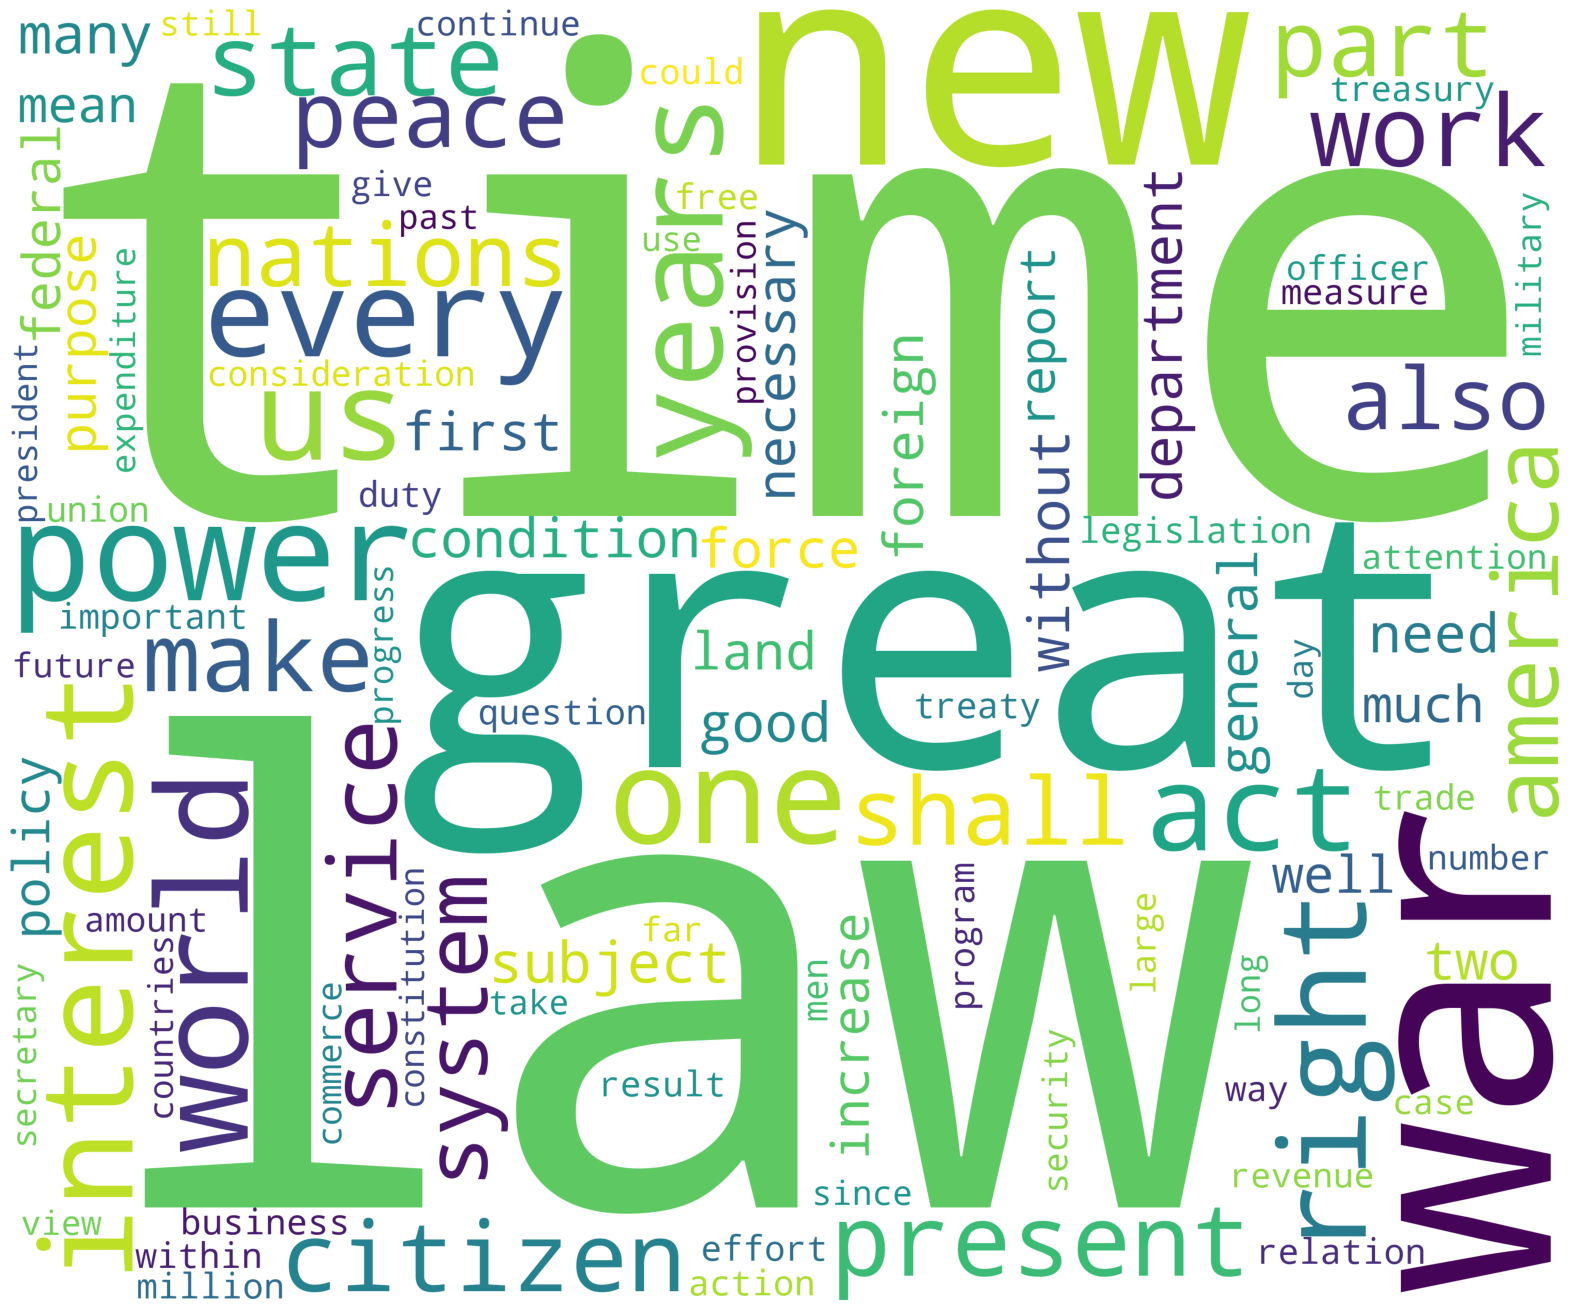

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cleaned_text = ' '.join(list(df.clean_text))
wordcloud = WordCloud(stopwords=stop_words,max_words=100,
                      background_color='white',min_font_size=6,
                      width=3000,collocations=False,
                      height=2500
                     ).generate(cleaned_text)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_1.png')
plt.show()

# Sentiment Analysis

In [12]:
# VADER as a sentiment analysis library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [13]:
mean_sentiment_by_president = df.groupby('president')['sentiment'].mean()

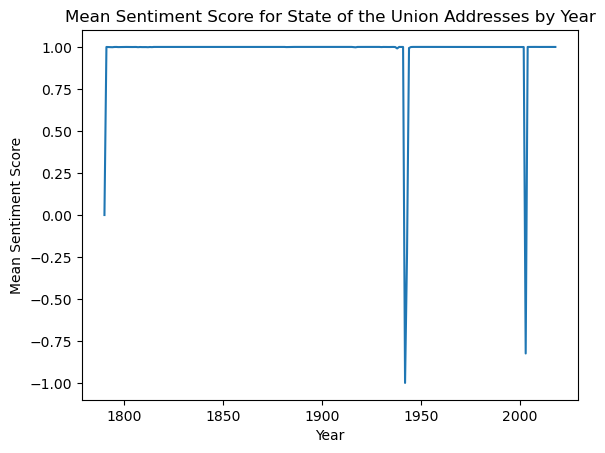

In [14]:
df = df.sort_values('year', ascending=True)
plt.plot(df['year'],df['sentiment'])
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score for State of the Union Addresses by Year')
plt.show()

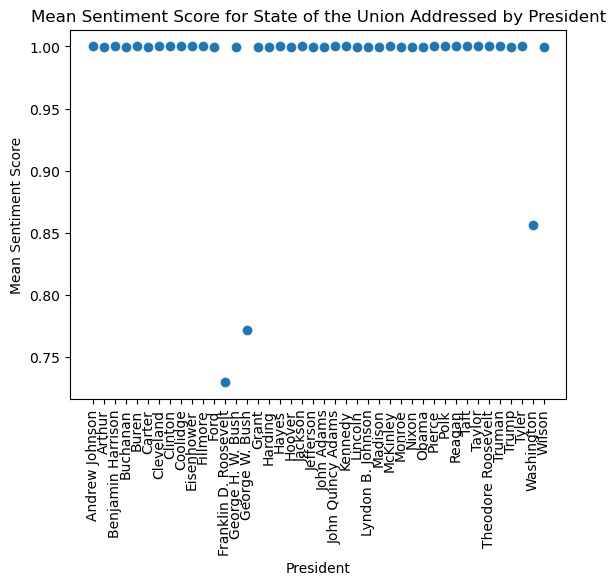

In [15]:
president_sentiment = pd.Series({
    'Andrew Johnson': 0.999950,
    'Arthur': 0.999600,
    'Benjamin Harrison': 1.000000,
    'Buchanan': 0.999925,
    'Buren': 1.000000,
    'Carter': 0.999925,
    'Cleveland': 0.999975,
    'Clinton': 0.999950,
    'Coolidge': 0.999983,
    'Eisenhower': 0.999988,
    'Fillmore': 1.000000,
    'Ford': 0.999900,
    'Franklin D. Roosevelt': 0.729550,
    'George H. W. Bush': 0.999875,
    'George W. Bush': 0.771913,
    'Grant': 0.999925,
    'Harding': 0.999700,
    'Hayes': 1.000000,
    'Hoover': 0.999625,
    'Jackson': 1.000000,
    'Jefferson': 0.999463,
    'John Adams': 0.999225,
    'John Quincy Adams': 0.999975,
    'Kennedy': 0.999950,
    'Lincoln': 0.999900,
    'Lyndon B. Johnson': 0.999800,
    'Madison': 0.999225,
    'McKinley': 1.000000,
    'Monroe': 0.999900,
    'Nixon': 0.999800,
    'Obama': 0.999850,
    'Pierce': 0.999975,
    'Polk': 0.999950,
    'Reagan': 0.999943,
    'Taft': 1.000000,
    'Taylor': 1.000000,
    'Theodore Roosevelt': 1.000000,
    'Truman': 0.999962,
    'Trump': 0.999850,
    'Tyler': 0.999975,
    'Washington': 0.856471,
    'Wilson': 0.999487
})
# Create a scatter plot of the mean sentiment score for each president
plt.scatter(president_sentiment.index, president_sentiment.values)
plt.xlabel('President')
plt.xticks(rotation=90)
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score for State of the Union Addressed by President')
plt.show()

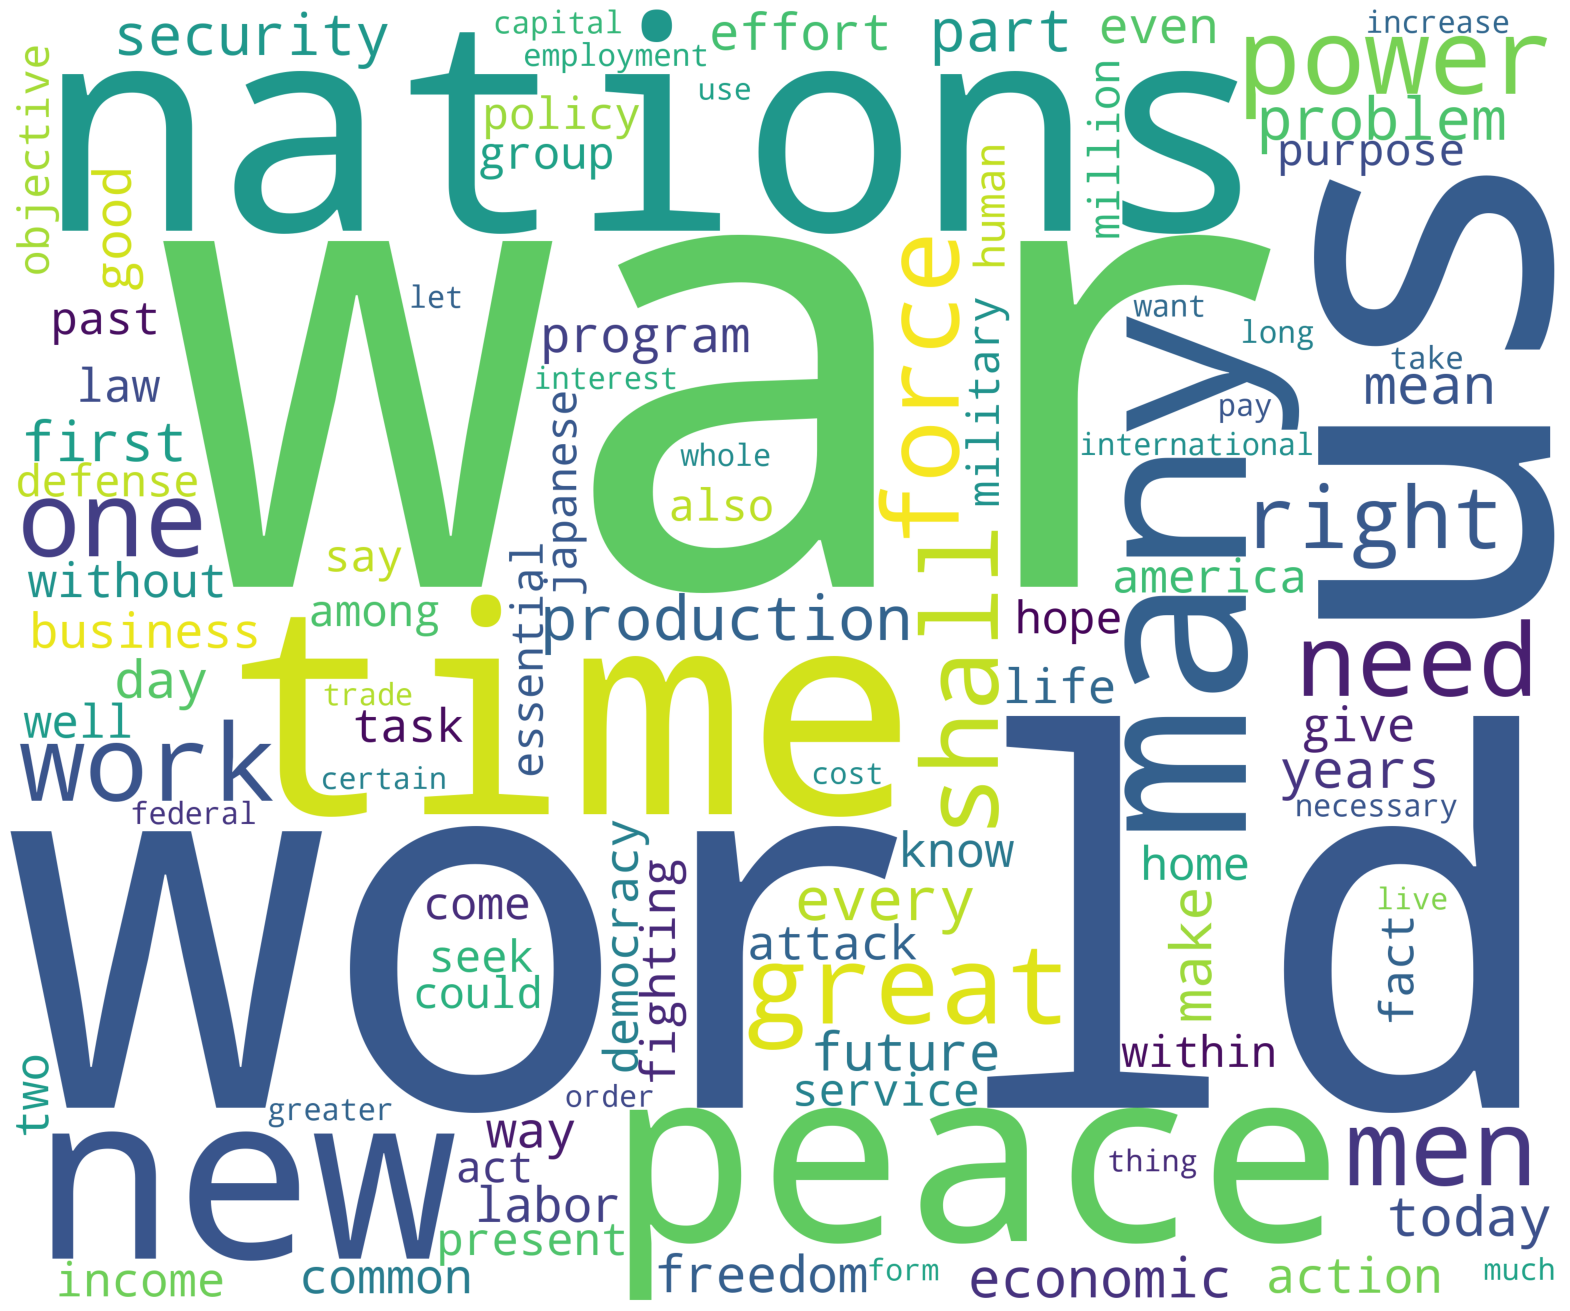

In [16]:
# Franklin D. Roosevelt
df_FRD = df[df['president'] == 'Franklin D. Roosevelt']
FRD = ' '.join(list(df_FRD.clean_text))
wordcloud = WordCloud(stopwords=stop_words,max_words=100,
                      background_color='white',min_font_size=6,
                      width=3000,collocations=False,
                      height=2500
                     ).generate(FRD)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_2.png')
plt.show()

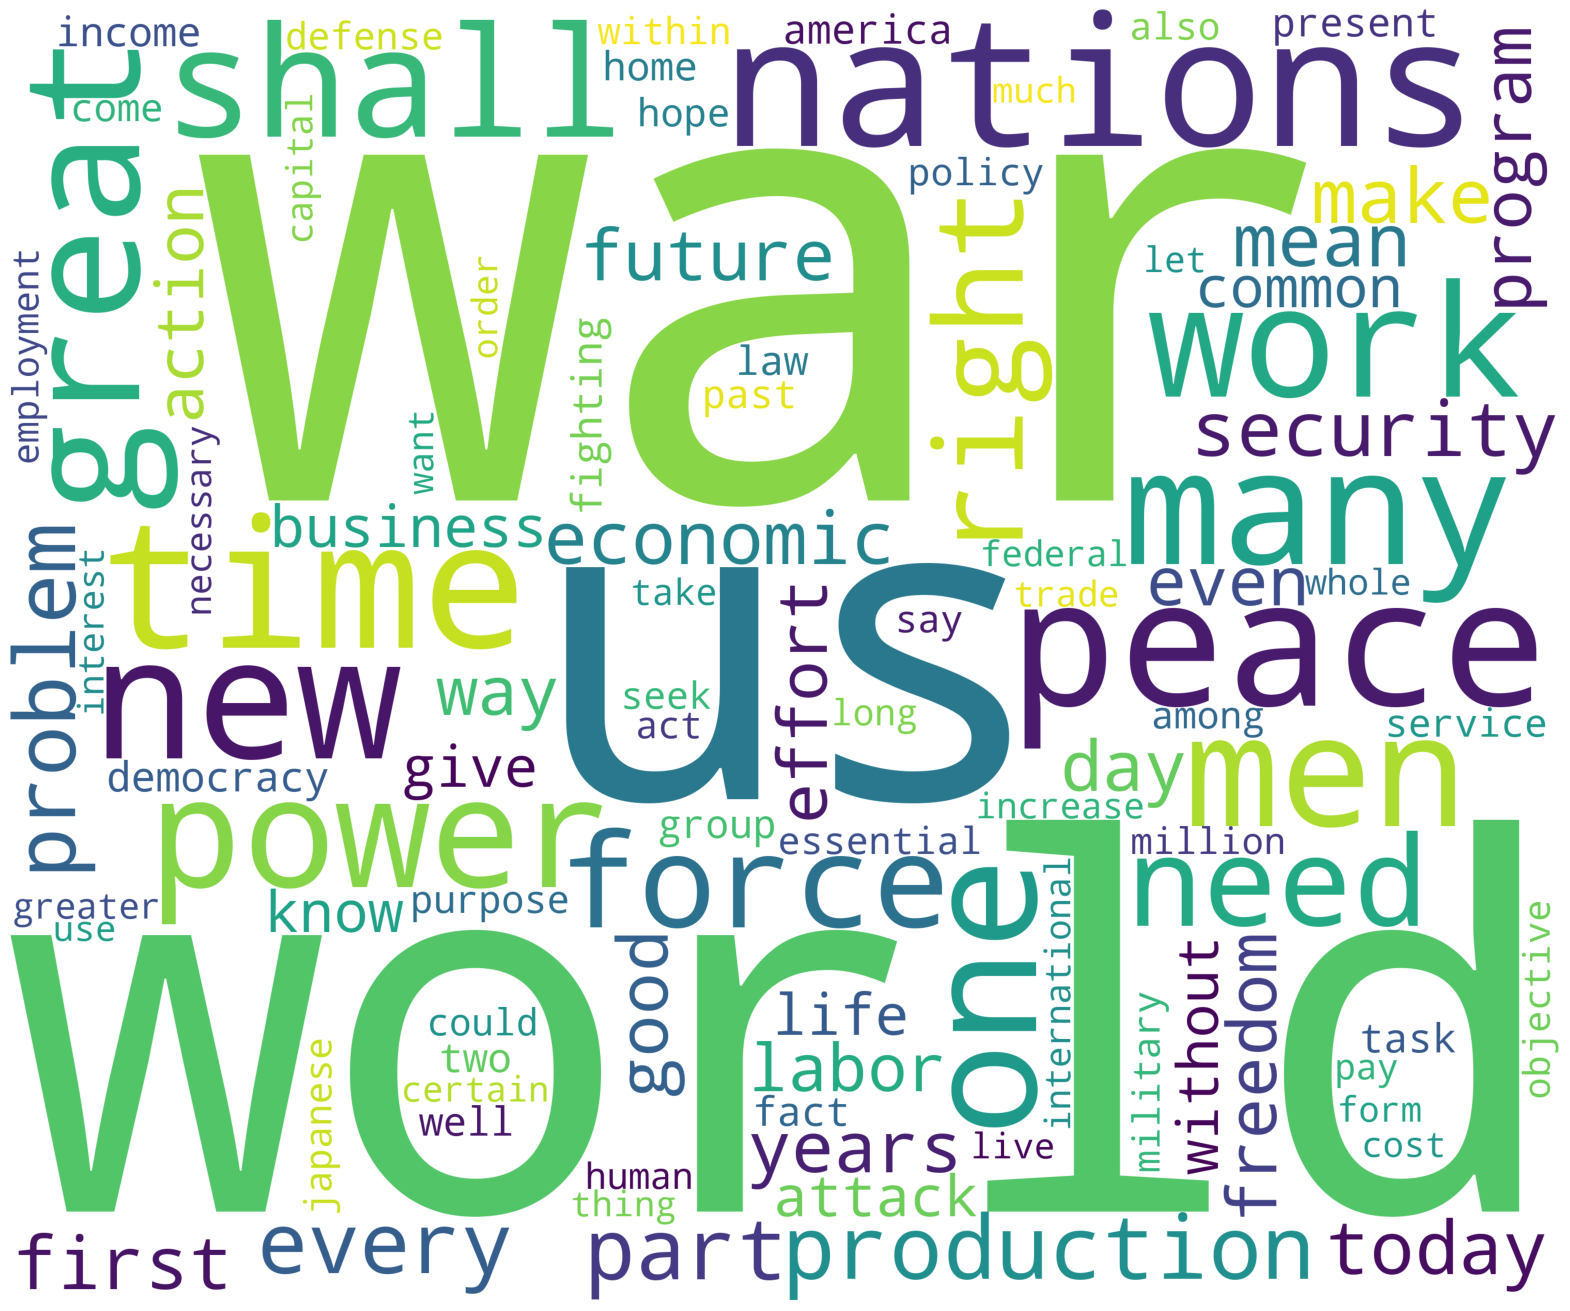

In [17]:
#Geogre H.W. Bush
df_Bush = df[df['president'] == 'Geogre H.W. Bush']
Bush = ' '.join(list(df_FRD.clean_text))
wordcloud = WordCloud(stopwords=stop_words,max_words=100,
                      background_color='white',min_font_size=6,
                      width=3000,collocations=False,
                      height=2500
                     ).generate(Bush)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_3.png')
plt.show()

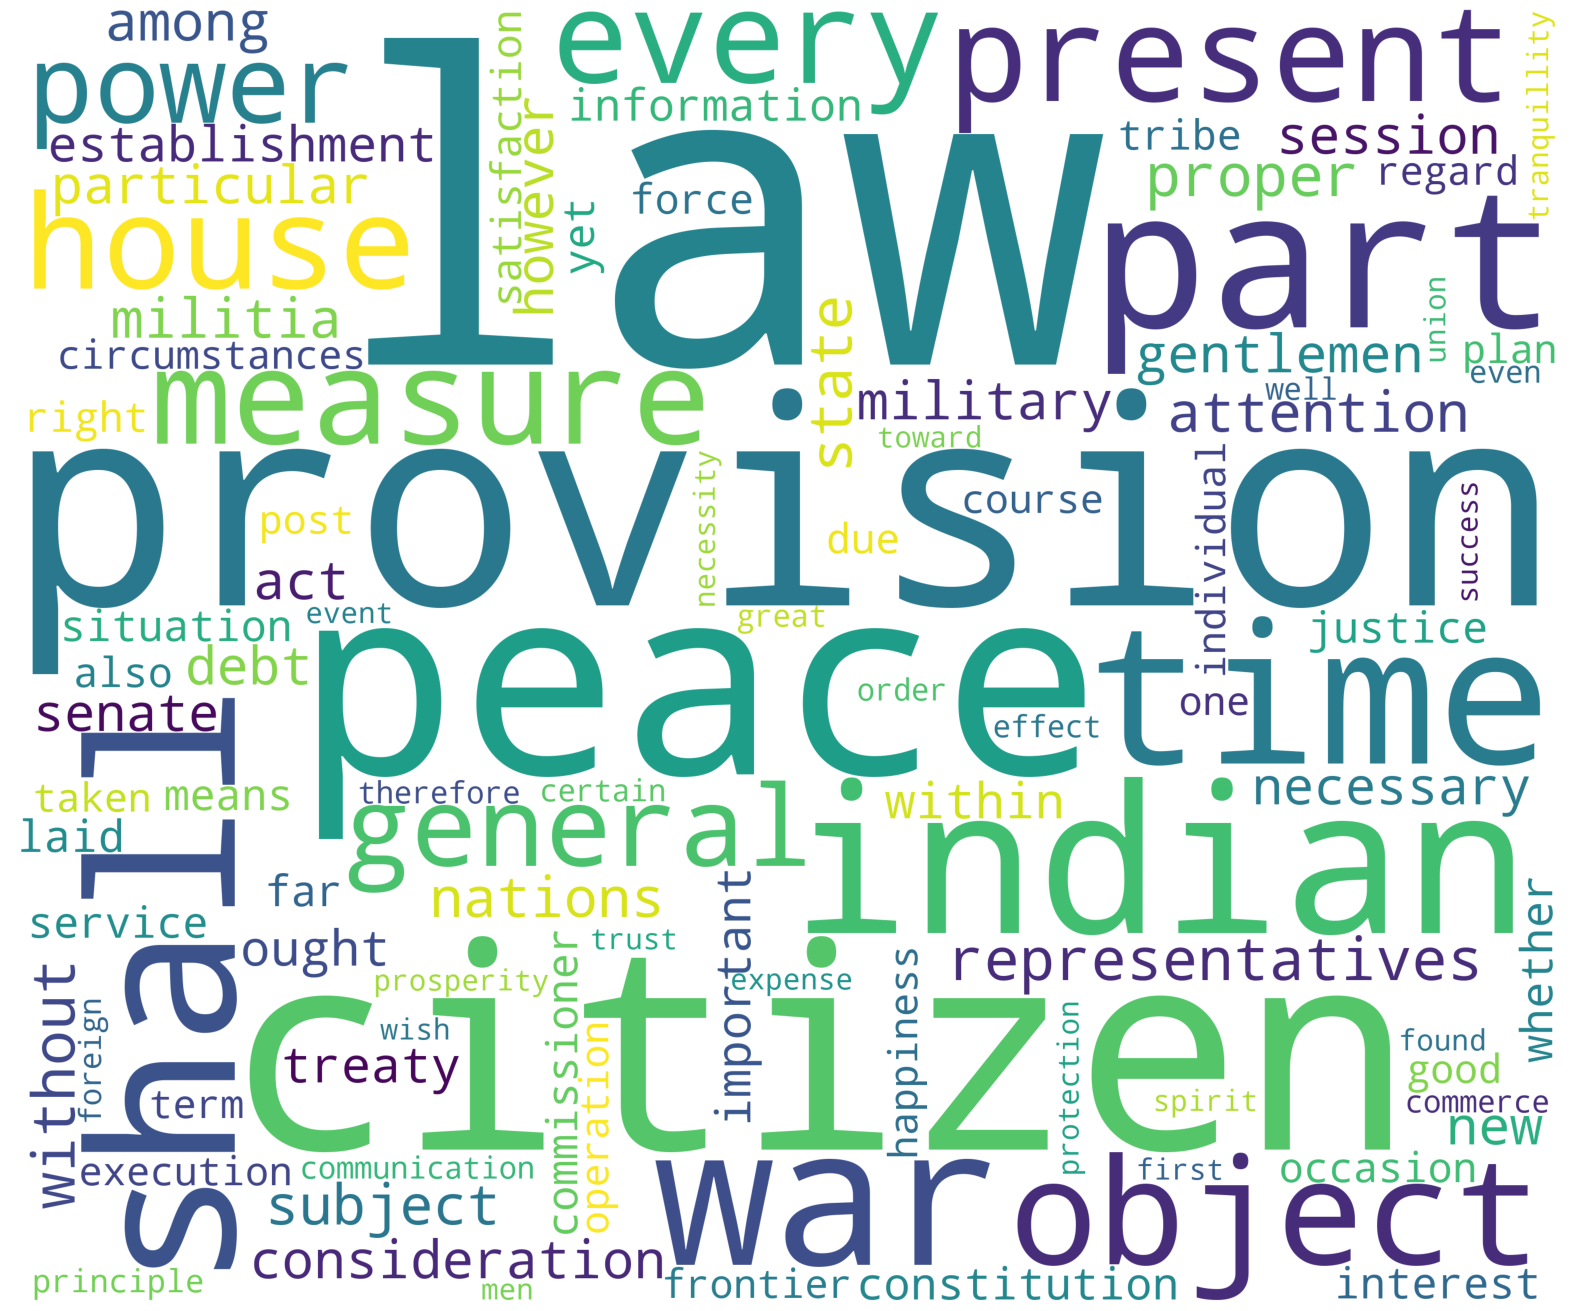

In [18]:
#Washington
df_Washington = df[df['president'] == 'Washington']
Washington = ' '.join(list(df_Washington.clean_text))
wordcloud = WordCloud(stopwords=stop_words,max_words=100,
                      background_color='white',min_font_size=6,
                      width=3000,collocations=False,
                      height=2500
                     ).generate(Washington)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_4.png')
plt.show()

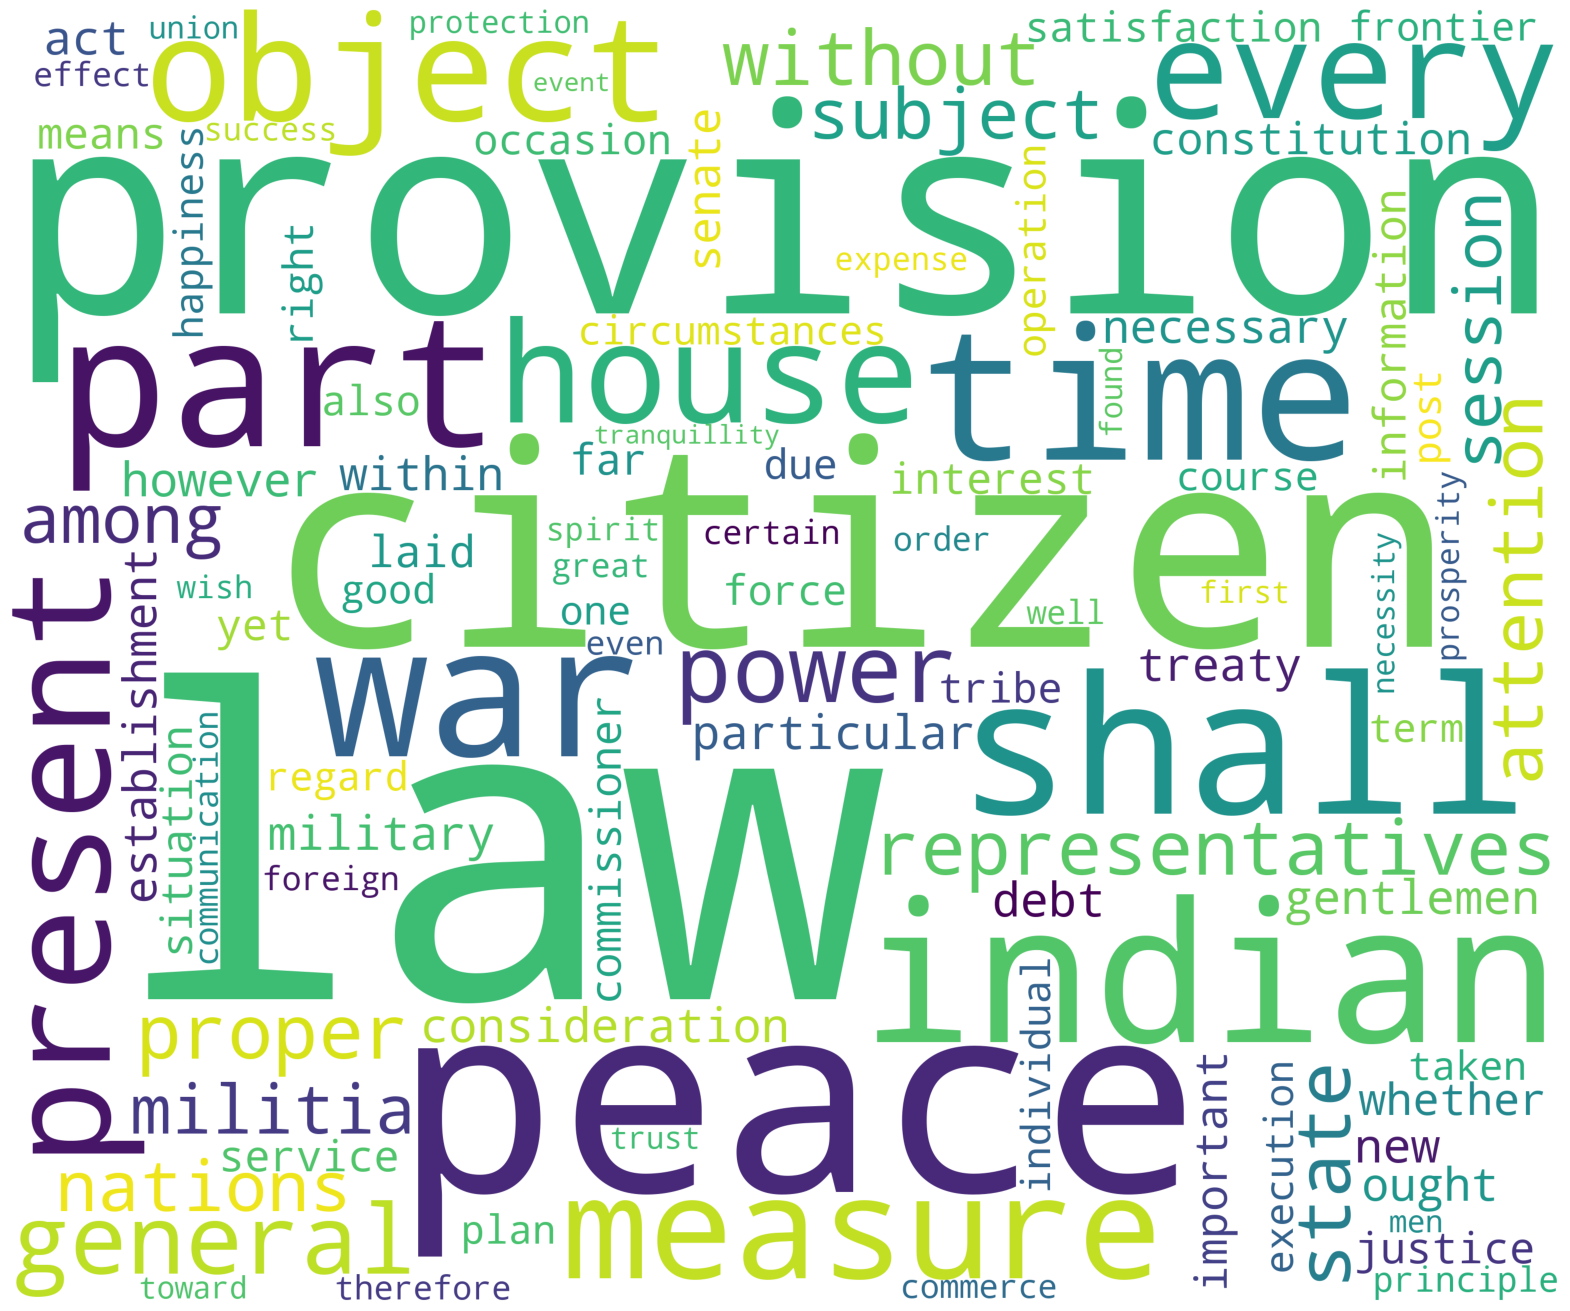

In [19]:
#Obama
df_Obama = df[df['president'] == 'Obama']
Obama = ' '.join(list(df_Washington.clean_text))
wordcloud = WordCloud(stopwords=stop_words,max_words=100,
                      background_color='white',min_font_size=6,
                      width=3000,collocations=False,
                      height=2500
                     ).generate(Obama)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud_5.png')
plt.show()